Explained variance ratio for 10 PCs:
[ 0.25057109  0.1420688   0.09699589  0.07514963  0.04743045  0.03678528
  0.03076347  0.01996043  0.01696821  0.01489828]


Pairwise Pearson values for age with top 10 PCs:
[(0.41445102980974746, 0.00026703574595531254), (-0.26135442044730262, 0.025519584055412537), (-0.039000926293581741, 0.74321612056843511), (-0.19429882249093516, 0.099521898711603149), (-0.057062806402672715, 0.63156807382800584), (-0.12338423339905204, 0.29834903967762244), (-0.16201951140911902, 0.17085241252963629), (0.4289236138884116, 0.00015295339344747997), (-0.084411047884735677, 0.47768609287554342), (-0.0045219160752896399, 0.96971270669093113)]


Pairwise Pearson values for post-mortem interval with top 10 PCs:
[(-0.31373867834289787, 0.0068731461257791771), (0.093903514180504577, 0.42940364539206977), (-0.072077071650397964, 0.54452358064865602), (0.048575580493929529, 0.68319462542963527), (-0.021859501586731781, 0.85435394378469387), (0.081087988584407009, 0.49524

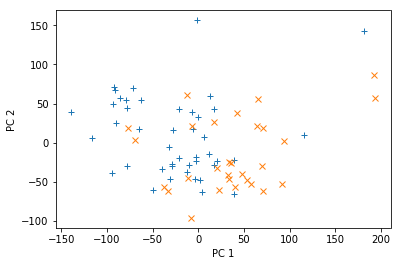

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

#rows are genes
#columns are samples

samples = []
with open('counts.txt') as f:
    samples.append(f.readline().strip().split('\t'))

patients = samples[0][1:]
data = np.genfromtxt('counts.txt', delimiter='\t', skip_header = 1)[:,1:]

transformed_data = np.log2(1 + data)
shape = transformed_data.shape
scaled_data = np.zeros((shape))
mean = np.mean(transformed_data, axis=1)
std = np.std(transformed_data, axis=1)
for i in range(0, 17580):
    for j in range(0, 73):
        scaled_data[i][j] = (transformed_data[i][j] - mean[i]) / std[i]
    
transposed_scaled_data = scaled_data.transpose()
pca_10 = PCA(n_components=10)
pca_10.fit(transposed_scaled_data)
pca_10_transform = pca_10.transform(transposed_scaled_data)

print "Explained variance ratio for 10 PCs:"
print pca_10.explained_variance_ratio_
print "\n"

pca_2 = PCA(n_components=2)
pca_2.fit(transposed_scaled_data)
pca_2_transform = pca_2.transform(transposed_scaled_data)

covariants = np.genfromtxt('cov.txt', delimiter='\t', skip_header=1)[:,1:]
post_mortem_interval = covariants[0]
rna_integrity_number = covariants[1]
age = covariants[2]

age_pearsonr_tests = []
pmi_pearsonr_tests = []
rna_pearsonr_tests = []

for i in range(0,10):
    age_pearsonr_tests.append(pearsonr(pca_10_transform.transpose()[i], age))
    pmi_pearsonr_tests.append(pearsonr(pca_10_transform.transpose()[i], post_mortem_interval))
    rna_pearsonr_tests.append(pearsonr(pca_10_transform.transpose()[i], rna_integrity_number))

print "Pairwise Pearson values for age with top 10 PCs:"
print age_pearsonr_tests
print "\n"
print "Pairwise Pearson values for post-mortem interval with top 10 PCs:"
print pmi_pearsonr_tests
print "\n"
print "Pairwise Pearson values for rna integrity number with top 10 PCs:"
print rna_pearsonr_tests
print "\n"

phenotype = np.genfromtxt('phen.txt', delimiter='\t', skip_header=1, usecols=1)
age_phenotype_tests = pearsonr(phenotype, age) 
pmi_phenotype_tests = pearsonr(phenotype, post_mortem_interval)
rna_phenotype_tests = pearsonr(phenotype, rna_integrity_number)

print "Pairwise Pearson values for age with phenotype:"
print age_phenotype_tests
print "\n"
print "Pairwise Pearson values for post-mortem interval with phenotype:"
print pmi_phenotype_tests
print "\n"
print "Pairwise Pearson values for rna integrity number with phenotype:"
print rna_phenotype_tests
print "\n"



control_data = transposed_scaled_data[44:,:]
parkinsons_data = transposed_scaled_data[:44,:]
t_test = ttest_ind(control_data, parkinsons_data, axis=0)
sig_genes = [x for x in t_test[1] if x < 0.05]
p_values = sorted(t_test[1])
critical_values = [0.05*((i + 1)/float(17580)) for i in range(0, 17580)]
corrected_p_values = []
for i in range(0, 17580):
    if p_values[i] < critical_values[i]:
        corrected_p_values.append(p_values[i])
        

plt.plot(pca_2_transform[:44,:1], pca_2_transform[:44,1:], "+", pca_2_transform[44:,:1], pca_2_transform[44:,1:], "x")
plt.ylabel("PC 2")
plt.xlabel("PC 1")
plt.show()


In [2]:
len(corrected_p_values)

6938

In [6]:
len(sig_genes)

8493